In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',500)

# Books Dataset

In [4]:
books = pd.read_csv('C:\\Users\\Alsaba\\Desktop\\Alsaba Complete Project\\Book Recommendation\\Dataset\\Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.shape

(271360, 8)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [8]:
books[books.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:
books.iloc[187689,1]

'The Credit Suisse Guide to Managing Your Personal Wealth'

In [10]:
books[books['Book-Title']=='The Credit Suisse Guide to Managing Your Personal Wealth']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [11]:
books[books['Book-Title']=='Tyrant Moon']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...


In [12]:
books.iloc[0,-1]

'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg'

In [13]:
books.iloc[1,-1]

'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg'

In [14]:
books.iloc[2,-1]

'http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg'

In [15]:
books['Book-Title'].value_counts().sort_values(ascending=False).head()

Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
Dracula                           20
Adventures of Huckleberry Finn    20
Name: Book-Title, dtype: int64

In [16]:
books[books['Book-Title']=='Finders Keepers'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...,http://images.amazon.com/images/P/082177364X.0...
42019,70465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...,http://images.amazon.com/images/P/0070465037.0...
58264,688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...,http://images.amazon.com/images/P/0688118461.0...
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...,http://images.amazon.com/images/P/1575663236.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [17]:
books[books['Book-Title']=='Selected Poems'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39416,811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41316,679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106885,60931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118775,517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...


In [18]:
print(len(books['ISBN'].unique()))
print(len(books['Book-Title'].unique()))
print(len(books['Book-Author'].unique()))
print(len(books['Year-Of-Publication'].unique()))

271360
242131
102024
202


In [19]:
books[books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [20]:
books=books.dropna().reset_index(drop=True)

In [21]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [22]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int64)

In [23]:
books.shape

(271354, 5)

In [24]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [25]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [26]:
books.describe()

,Year-Of-Publication
count,271354.000000
mean,1959.760379
std,257.995618
min,0.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [27]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int64 
 4   Publisher            271354 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [28]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [29]:
books['Book-Author']=[i.title() for i in books['Book-Author']]
books['Book-Author']=[i.strip() for i in books['Book-Author']]
books['Book-Author']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Book-Author']]

books['Book-Title']=[i.title() for i in books['Book-Title']]
books['Book-Title']=[i.strip() for i in books['Book-Title']]
books['Book-Title']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Book-Title']]

books['Publisher']=[i.title() for i in books['Publisher']]
books['Publisher']=[i.strip() for i in books['Publisher']]
books['Publisher']=[i.translate(str.maketrans('','',string.punctuation)) for i in books['Publisher']]

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P O Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,Harperflamingo Canada
2,60973129,Decision In Normandy,Carlo DEste,1991,Harperperennial
3,374157065,Flu The Story Of The Great Influenza Pandemic ...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies Of Urumchi,E J W Barber,1999,W W Norton Amp Company
...,...,...,...,...,...
271349,440400988,ThereS A Bat In Bunk Five,Paula Danziger,1988,Random House Childrens Pub Mm
271350,525447644,From One To One Hundred,Teri Sloat,1991,Dutton Books
271351,006008667X,Lily Dale The True Story Of The Town That Tal...,Christine Wicker,2004,Harpersanfrancisco
271352,192126040,Republic WorldS Classics,Plato,1996,Oxford University Press


In [30]:
zero_pub = books[(books['Year-Of-Publication']==0)].copy()
zero_pub

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,Philipp Reclam Jun Verlag Gmbh
188,342311360X,Die Liebe In Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag Dtv
288,571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,Herr Der Fliegen Fiction Poetry And Drama,Golding,0,Fischer Taschenbuch Verlag Gmbh
542,8845229041,Biblioteca Universale Rizzoli Sulla Sponda Del...,P Coelho,0,Fabbri Rcs Libri
...,...,...,...,...,...
270788,014029953X,Foe EssentialPenguin S,JM Coetzee,0,Penguin Books Ltd
270907,340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271088,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271176,887781721,Tom Penny,Tony German,0,P Martin Associates


In [31]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(np.int32)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [32]:
title = list(zero_pub['Book-Title'])

In [33]:
zero_pub[zero_pub['Book-Title']=='Rainbow The Stormy Life Of Judy Garland']['Year-Of-Publication']

641    0
Name: Year-Of-Publication, dtype: int64

In [34]:
list(books[(books['Book-Title']=='Kabale Und Liebe') & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values)


[]

In [35]:
for i in title:
    d = (list(books[(books['Book-Title']==i) & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values))
    if len(d)!=0:
        zero_pub.loc[zero_pub['Book-Title']==i,'Year-Of-Publication']=d[0]

In [36]:
zero_pub[zero_pub['Year-Of-Publication']==0].shape

(3462, 5)

In [37]:
zero_pub.shape

(4618, 5)

In [38]:
books[books['Year-Of-Publication']==0].shape

(4618, 5)

In [39]:
for i in title:
    d = (list(books[(books['Book-Title']==i) & (books['Year-Of-Publication']!=0)]['Year-Of-Publication'].values))
    if len(d)!=0:
        books.loc[(books['Book-Title']==i) & (books['Year-Of-Publication']==0) ,'Year-Of-Publication']=d[0]

In [40]:
books[books['Year-Of-Publication']==0].shape

(3462, 5)

In [41]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271354 entries, 0 to 271353
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271354 non-null  object
 1   Book-Title           271354 non-null  object
 2   Book-Author          271354 non-null  object
 3   Year-Of-Publication  271354 non-null  int32 
 4   Publisher            271354 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [42]:
books[books['Year-Of-Publication']==0].shape

(3462, 5)

In [43]:
mdin = books['Year-Of-Publication'].median()
mdin

1995.0

In [44]:
books[books['Year-Of-Publication']>2022].shape

(13, 5)

In [45]:
books.loc[books['Year-Of-Publication']==0,'Year-Of-Publication']=mdin
books.loc[books['Year-Of-Publication']>2022,'Year-Of-Publication']=mdin


In [46]:
books[books['Year-Of-Publication']==0].shape

(0, 5)

In [47]:
list(books['Book-Author'].value_counts().head(20))

[636,
 571,
 534,
 428,
 419,
 373,
 344,
 319,
 308,
 307,
 286,
 285,
 236,
 230,
 222,
 221,
 220,
 220,
 214,
 214]

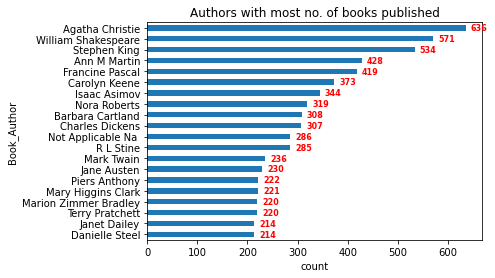

<Figure size 1152x864 with 0 Axes>

In [48]:
ax=books['Book-Author'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book_Author')
plt.title('Authors with most no. of books published')
plt.figure(figsize=(16,12))
for i,v in enumerate(list(books['Book-Author'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',fontweight='bold',fontsize=8,color='red')

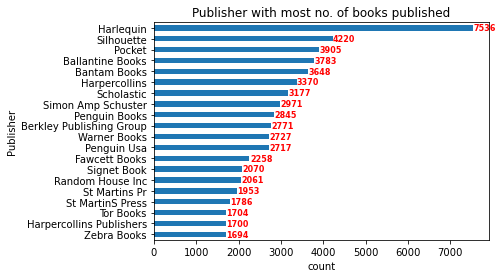

<Figure size 1152x864 with 0 Axes>

In [49]:
ax=books['Publisher'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Publisher')
plt.title('Publisher with most no. of books published')
plt.figure(figsize=(16,12))
for i,v in enumerate(list(books['Publisher'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',fontweight='bold',fontsize=8,color='red')

# ratings dataset

In [50]:
ratings = pd.read_csv('C:\\Users\\Alsaba\\Desktop\\Alsaba Complete Project\\Book Recommendation\\Dataset\\Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [51]:
ratings.shape

(1048575, 3)

In [52]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [53]:
ratings.describe()

,User-ID,Book-Rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [54]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [55]:
ratings[ratings.duplicated()]

,User-ID,ISBN,Book-Rating
21604,4334,6.30892E+11,0
28622,6575,6.30892E+11,0
58889,11676,9.78843E+12,0
59326,11795,0,7
59327,11795,0,0
71419,15100,9.78887E+12,0
71420,15100,9.78887E+12,0
73914,15922,9.78228E+12,0
91079,20180,7.6783E+12,9
91080,20180,7.6783E+12,9


In [56]:
print(len(ratings['ISBN'].unique()))
print(len(ratings['User-ID'].unique()))

322473
95513


# combine books+ratings

In [57]:
combine = pd.merge(ratings,books,on='ISBN',how='inner')
combine.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones A Novel,M J Rose,2002,Ballantine Books


In [58]:
combine.shape

(941105, 7)

In [59]:
combine.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [60]:
combine[combine.duplicated()]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
9746,106266,971880107,0,Wild Animus,Rich Shapero,2004,Too Far
47922,52584,399501487,0,Lord Of The Flies,William Gerald Golding,1959,Perigee Trade
410333,194027,60177209,0,Dolly My Life And Other Unfinished Business,Dolly Parton,1994,Harpercollins
412898,127429,64400085,0,These Happy Golden Years Little House,Laura Ingalls Wilder,1953,Harpertrophy
570979,26535,843947624,0,Unforgettable,Madeline Baker,2000,Leisure Books
802977,102967,425031748,0,Once And Future King,T H White,1976,Berkley Publishing Group
868293,159973,965078736,0,Yahoodywho,Kathy Griffin,2001,Mibs Publishing


In [61]:
print(len(combine['ISBN'].unique()))
print(len(combine['Book-Title'].unique()))
print(len(combine['User-ID'].unique()))

257808
226179
83643


# users dataset

In [62]:
users = pd.read_csv('C:\\Users\\Alsaba\\Desktop\\Alsaba Complete Project\\Book Recommendation\\Dataset\\Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [63]:
users.shape

(278858, 3)

In [64]:
len(users['User-ID'].unique())  ## all user-id are unique in users dataset

278858

In [65]:
len(users['Location'].unique())

57339

In [66]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [67]:
users[users['Age']>120].shape

(78, 3)

In [68]:
users[users['Age']<5].shape

(882, 3)

In [69]:
users[users.duplicated()]

,User-ID,Location,Age


In [70]:
users.iloc[4,1].split(',')[-1].strip().title()

'United Kingdom'

In [71]:
users['Country'] = [i.split(',')[-1].strip().title() for i in users['Location']]

In [72]:
users.loc[users['Country']=='','Country']='others'

In [73]:
list(users['Country'].value_counts().head(10).sort_values())

[3325, 3455, 4578, 11266, 11784, 13146, 17043, 18538, 21658, 139711]

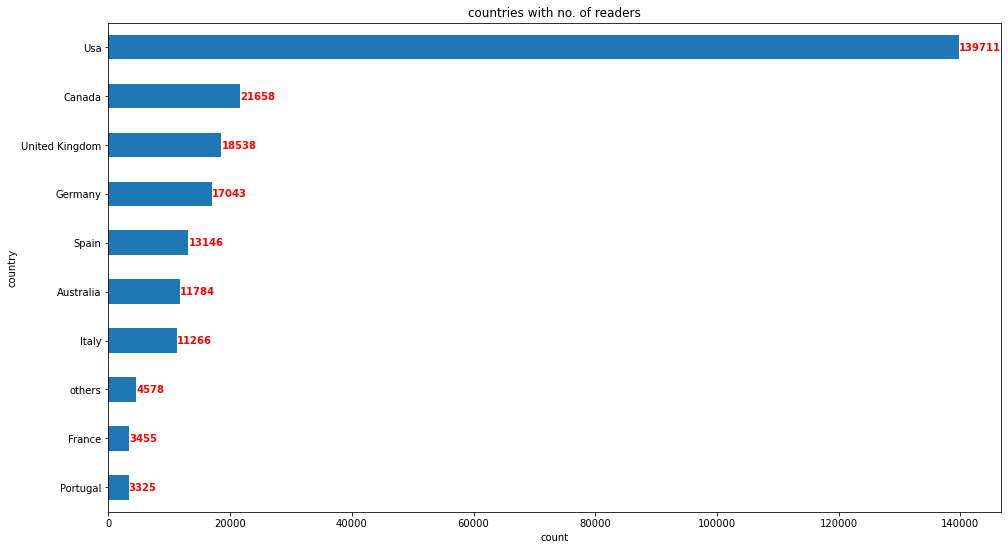

In [74]:
plt.figure(figsize=(16,9))
ax=users['Country'].value_counts().head(10).sort_values().plot(kind='barh')
plt.ylabel('country')
plt.xlabel('count')
plt.title('countries with no. of readers')
for i,v in enumerate(list(users['Country'].value_counts().head(10).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

# master data combine(books+raings) + users

In [75]:
uncleaned_master_data = pd.merge(combine,users,on='User-ID',how='inner')
uncleaned_master_data.shape

(941105, 10)

In [76]:
uncleaned_master_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"tyler, texas, usa",NaN,Usa
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,Usa
2,2313,812533550,9,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,Usa
3,2313,679745580,8,In Cold Blood Vintage International,Truman Capote,1994,Vintage,"cincinnati, ohio, usa",23.0,Usa
4,2313,60173289,9,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,1996,Harpercollins,"cincinnati, ohio, usa",23.0,Usa


In [77]:
uncleaned_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941105 entries, 0 to 941104
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              941105 non-null  int64  
 1   ISBN                 941105 non-null  object 
 2   Book-Rating          941105 non-null  int64  
 3   Book-Title           941105 non-null  object 
 4   Book-Author          941105 non-null  object 
 5   Year-Of-Publication  941105 non-null  int32  
 6   Publisher            941105 non-null  object 
 7   Location             941105 non-null  object 
 8   Age                  685466 non-null  float64
 9   Country              941105 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(6)
memory usage: 75.4+ MB


In [78]:
uncleaned_master_data.describe()

,User-ID,Book-Rating,Year-Of-Publication,Age
count,941105.000000,941105.000000,941105.000000,685466.000000
mean,128793.839451,2.851685,1995.262277,37.681030
std,74247.985759,3.857918,7.365512,14.203775
min,2.000000,0.000000,1376.000000,0.000000
25%,63494.000000,0.000000,1992.000000,28.000000
50%,128835.000000,0.000000,1997.000000,36.000000
75%,193560.000000,7.000000,2001.000000,46.000000
max,278854.000000,10.000000,2021.000000,244.000000


In [79]:
uncleaned_master_data.isna().any()

User-ID                False
ISBN                   False
Book-Rating            False
Book-Title             False
Book-Author            False
Year-Of-Publication    False
Publisher              False
Location               False
Age                     True
Country                False
dtype: bool

In [80]:
uncleaned_master_data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Location                    0
Age                    255639
Country                     0
dtype: int64

In [81]:
print(len(uncleaned_master_data['ISBN'].unique()))
print(len(uncleaned_master_data['Book-Title'].unique()))
print(len(uncleaned_master_data['User-ID'].unique()))

257808
226179
83643


In [82]:
columns = uncleaned_master_data.columns
for i in columns:
    print(uncleaned_master_data[i].value_counts())

11676     11147
198711     6456
153662     5817
98391      5777
35859      5646
          ...  
228693        1
192777        1
3884          1
94652         1
250757        1
Name: User-ID, Length: 83643, dtype: int64
971880107     2264
316666343     1164
385504209      813
312195516      668
60928336       662
              ... 
871567687        1
083090025X       1
083063553X       1
827354118        1
970635834        1
Name: ISBN, Length: 257808, dtype: int64
0     589252
8      84147
10     65112
7      60821
9      55964
5      41810
6      28976
4       6860
3       4684
2       2139
1       1340
Name: Book-Rating, dtype: int64
Wild Animus                                               2264
The Lovely Bones A Novel                                  1164
The Da Vinci Code                                          828
A Painted House                                            766
The Nanny Diaries A Novel                                  759
                                         

In [83]:
uncleaned_master_data['Age'].value_counts().sort_index()

0.0        504
1.0        380
2.0        233
3.0        143
4.0        271
5.0        158
6.0          9
7.0        146
8.0        455
9.0        335
10.0       167
11.0       512
12.0       651
13.0      1171
14.0      2557
15.0      2884
16.0      2973
17.0      4610
18.0      8337
19.0      4868
20.0      5671
21.0      9204
22.0     10159
23.0     16114
24.0     17201
25.0     18185
26.0     19766
27.0     19897
28.0     24996
29.0     28942
30.0     25178
31.0     23743
32.0     21669
33.0     27443
34.0     23005
35.0     18018
36.0     24609
37.0     19436
38.0     21168
39.0     15986
40.0     14587
41.0     14520
42.0      9971
43.0     20117
44.0     20567
45.0     11013
46.0     14059
47.0     17677
48.0      6626
49.0     13416
50.0      7320
51.0     13261
52.0     16948
53.0      6131
54.0      9127
55.0      5491
56.0      7914
57.0      8429
58.0      8114
59.0      2721
60.0      3513
61.0      4048
62.0      8167
63.0      2921
64.0       963
65.0      3867
66.0      

In [84]:
uncleaned_master_data[uncleaned_master_data['Age']<6].shape

(1689, 10)

In [85]:
uncleaned_master_data[uncleaned_master_data['Age']>120].shape

(1117, 10)

In [86]:
uncleaned_master_data[uncleaned_master_data['Age']>120]['Book-Title'].value_counts()

Visions Of Sugar Plums                                                         3
A Thin Dark Line Mysteries Amp Horror                                          3
A Painted House                                                                2
The Indwelling The Beast Takes Possession Left Behind 7                        2
Masquerade                                                                     2
                                                                              ..
The Templar Revelation Secret Guardians Of The True Identity Of Christ         1
The Joslin Diabetes Healthy Carbohydrate Cookbook                              1
Resurrecting Mingus                                                            1
OneNight Stands With American History Odd Amusing And LittleKnown Incidents    1
Les Champs Dhonneur                                                            1
Name: Book-Title, Length: 1078, dtype: int64

In [87]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<15)]['Age'].value_counts().sort_index()

6.0        9
7.0      146
8.0      455
9.0      335
10.0     167
11.0     512
12.0     651
13.0    1171
14.0    2557
Name: Age, dtype: int64

In [88]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<15)]['Age'].value_counts().sort_index()

6.0        9
7.0      146
8.0      455
9.0      335
10.0     167
11.0     512
12.0     651
13.0    1171
14.0    2557
Name: Age, dtype: int64

In [89]:
uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<10)]['Book-Title'].value_counts()

Ricky RicottaS Mighty Robot Vs The Mutant Mosquitoes From Mercury The Second Robot Adventure Noel Ricky Ricotta    3
CharlotteS Web                                                                                                     3
ArthurS Reading Race StepIntoReading Step 3                                                                        3
Junie B First Grader Boss Of Lunch Junie B Jones                                                                   3
Twits                                                                                                              3
                                                                                                                  ..
The Amazing Jessica Sweet Valley Kids 60                                                                           1
A Curse On Elizabeth Sweet Valley Kids Hair Raiser Super Special No 3                                              1
Lila On The Loose Unicorn Club No 14                            

# Visualisations for master data

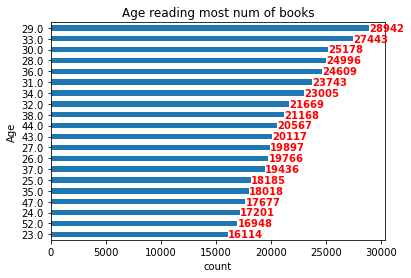

In [90]:
ax=uncleaned_master_data['Age'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Age')
plt.title('Age reading most num of books')
for i,v in enumerate(list(uncleaned_master_data['Age'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

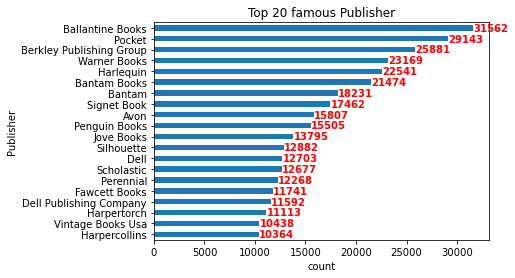

In [91]:
ax=uncleaned_master_data['Publisher'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Publisher')
plt.title('Top 20 famous Publisher')
for i,v in enumerate(list(uncleaned_master_data['Publisher'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

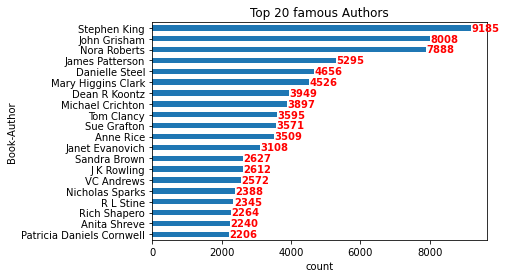

In [92]:
ax=uncleaned_master_data['Book-Author'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.title('Top 20 famous Authors')
for i,v in enumerate(list(uncleaned_master_data['Book-Author'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

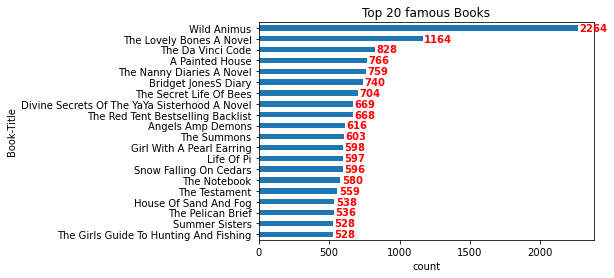

In [93]:
ax=uncleaned_master_data['Book-Title'].value_counts().head(20).sort_values().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Book-Title')
plt.title('Top 20 famous Books')
for i,v in enumerate(list(uncleaned_master_data['Book-Title'].value_counts().head(20).sort_values())):
    ax.text(v+10,i,str(v),ha='left',va='center',color='red',fontweight='bold')

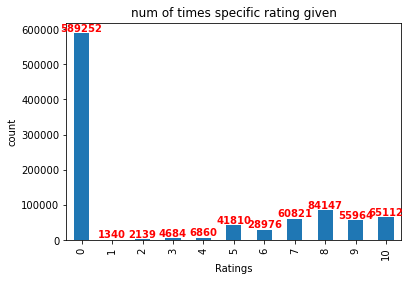

In [94]:
ax=uncleaned_master_data['Book-Rating'].value_counts().head(20).sort_index().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.title('num of times specific rating given')
for i,v in enumerate(list(uncleaned_master_data['Book-Rating'].value_counts().head(20).sort_index())):
    ax.text(i,v+10,str(v),ha='center',va='bottom',color='red',fontweight='bold')

In [95]:
top_rated_books = pd.DataFrame(np.round(uncleaned_master_data.groupby(['Book-Title']).mean(),0)['Book-Rating'])
top_rated_books

,Book-Rating
Book-Title,
A Novel,0.0
A Nutshell Handbook,6.0
Allo Allo The War Diaries Of Rene Artois,5.0
And For Starters,0.0
Boule De Suif Penguin Classics,7.0
...,...
ÃÂL Connection,0.0
ÃÂLpiraten,0.0
ÃÂRger Mit Produkt X Roman,5.0


In [96]:
top_rated_books[top_rated_books['Book-Rating']==10]

,Book-Rating
Book-Title,
10 Gebote FãÂ¼R Anspruchsvolle Frauen,10.0
10 Real Sats Serial,10.0
10 Real Sats Third Edition,10.0
100 Best Tv Commercials And Why They Worked,10.0
100 CrossStitch Christmas Ornaments,10.0
...,...
Zoo Man Inside The Zoo Revolution,10.0
Zwei FãÂ¤Lle FãÂ¼R Mrs Murphy Schade DaãÂ Du Nicht Tot Bist Ruhe In Fetzen,10.0
ZwãÂ¶Lf Goldene FãÂ¤Den Lebensweisheiten Einer Wundervollen Grossmutter,10.0


In [97]:
top_read_books = list(uncleaned_master_data['Book-Title'].value_counts().head(20).index)
top_read_books

['Wild Animus',
 'The Lovely Bones A Novel',
 'The Da Vinci Code',
 'A Painted House',
 'The Nanny Diaries A Novel',
 'Bridget JonesS Diary',
 'The Secret Life Of Bees',
 'Divine Secrets Of The YaYa Sisterhood A Novel',
 'The Red Tent Bestselling Backlist',
 'Angels Amp Demons',
 'The Summons',
 'Girl With A Pearl Earring',
 'Life Of Pi',
 'Snow Falling On Cedars',
 'The Notebook',
 'The Testament',
 'House Of Sand And Fog',
 'The Pelican Brief',
 'Summer Sisters',
 'The Girls Guide To Hunting And Fishing']

In [98]:
top_books_rating = []
for i in top_read_books:
    top_books_rating.append(top_rated_books.loc[i,'Book-Rating'])

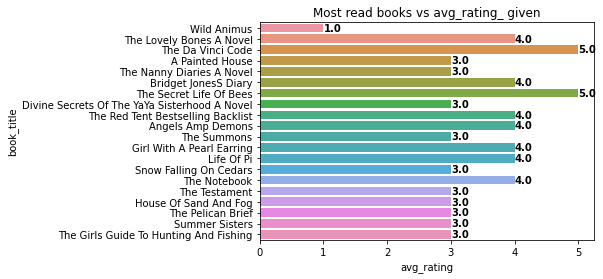

In [99]:
ax=sns.barplot(x=top_books_rating,y=top_read_books)
plt.xlabel('avg_rating')
plt.ylabel('book_title')
plt.title('Most read books vs avg_rating_ given')
for i,v in enumerate(top_books_rating):
    ax.text(v,i,str(v),fontweight='bold',ha='left',va='center')


# Imputation for Age feature

In [100]:
age_books = uncleaned_master_data[['Age','Book-Title','Book-Author','Publisher']].copy()
age_books

,Age,Book-Title,Book-Author,Publisher
0,NaN,Flesh Tones A Novel,M J Rose,Ballantine Books
1,23.0,Flesh Tones A Novel,M J Rose,Ballantine Books
2,23.0,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,Tor Books
3,23.0,In Cold Blood Vintage International,Truman Capote,Vintage
4,23.0,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,Harpercollins
...,...,...,...,...
941100,NaN,Corporate Crime Contemporary Debates,Frank Pearce,University Of Toronto Press
941101,60.0,Nach ÃGyppten Sic Ein Moderner Roman Zwei Bã¼...,Hans Pleschinski,Haffmans
941102,NaN,Du Wirst Lachen Mir GehtS Gut,Claudia Keller,Goldmann
941103,23.0,Die KãÂ¶Nigin Und Die Hure Historischer Roman,Ellen Jones,Aufbau Tb


In [101]:
age_books.isna().sum()

Age            255639
Book-Title          0
Book-Author         0
Publisher           0
dtype: int64

In [102]:
age_books[age_books['Age']>120]

,Age,Book-Title,Book-Author,Publisher
64720,201.0,A Painted House,John Grisham,Doubleday
64721,201.0,How Stella Got Her Groove Back,Terry Mcmillan,Signet Book
64722,201.0,The Lovely Bones A Novel,Alice Sebold,Little Brown
64723,201.0,The Da Vinci Code,Dan Brown,Doubleday
64724,201.0,Harry Potter And The Chamber Of Secrets Book 2,J K Rowling,Scholastic
...,...,...,...,...
933968,151.0,Alle Meine Rosen Sind Blau Reportagen Aus Deut...,Bruno Schrep,Hirzel Stuttgart
933969,151.0,Wart Mal Schnell Minima Temporalia,Karlheinz A GeiãÂLer,Hirzel Stuttgart
933970,151.0,Die Macht Der Seuchen Mensch Und Mikrobe Eine...,Claudia EberhardMetzger,Hirzel Stuttgart
933971,151.0,Mensch Tier Von Bestien Biestern Und Kuschelti...,Heide Platen,Hirzel Stuttgart


In [103]:
age_books[age_books['Age']>120]['Book-Title'].value_counts()

Visions Of Sugar Plums                                                         3
A Thin Dark Line Mysteries Amp Horror                                          3
A Painted House                                                                2
The Indwelling The Beast Takes Possession Left Behind 7                        2
Masquerade                                                                     2
                                                                              ..
The Templar Revelation Secret Guardians Of The True Identity Of Christ         1
The Joslin Diabetes Healthy Carbohydrate Cookbook                              1
Resurrecting Mingus                                                            1
OneNight Stands With American History Odd Amusing And LittleKnown Incidents    1
Les Champs Dhonneur                                                            1
Name: Book-Title, Length: 1078, dtype: int64

In [104]:
age_books[age_books['Age']>120]['Book-Author'].value_counts().head(300)

Catherine Coulter                           17
Mary Higgins Clark                          14
Janet Evanovich                             14
Stephen King                                12
Debbie Macomber                             12
John Grisham                                11
Tim Lahaye                                  10
Lilian Jackson Braun                        10
Fern Michaels                                9
Tami Hoag                                    9
Max Lucado                                   8
Andrew M Greeley                             7
Michael Crichton                             6
Beverly Lewis                                6
Danielle Steel                               6
Anne Rice                                    6
Louis LAmour                                 5
Nora Roberts                                 5
Bathroom Readers Institute                   5
Diana Gabaldon                               5
Roald Dahl                                   5
Dan Brown    

In [105]:
age_books[age_books['Age']>120]['Publisher'].value_counts().head(500)

Ballantine Books                                              37
Pocket                                                        31
Warner Books                                                  29
Bantam Books                                                  26
Bantam                                                        25
Signet Book                                                   23
Penguin Books                                                 23
Simon Amp Schuster                                            21
Viking Books                                                  21
St MartinS Press                                              18
Tyndale House Publishers                                      15
Penguin Usa                                                   15
Ivy Books                                                     14
Jove Books                                                    14
Berkley Publishing Group                                      13
Harpercollins            

In [106]:
publisher = list(age_books[age_books['Age']>120]['Publisher'].value_counts().head(400).index)

In [107]:
age_books[age_books['Publisher']=='Ballantine Books']['Age'].value_counts().sort_values(ascending=False).head()

29.0    904
33.0    883
28.0    854
30.0    824
36.0    790
Name: Age, dtype: int64

In [108]:
list(age_books[age_books['Publisher']=='Pocket']['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]

33.0

In [109]:
max_age = []
for i in publisher:
    max_age.append(list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index))

In [110]:
for i in publisher:
    m=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age']>120),'Age']=m
                                                

In [111]:
age_books[age_books['Age']>120].shape

(20, 4)

In [112]:
authors = list(age_books[age_books['Age']>120]['Book-Author'].value_counts().head(50).index)

In [113]:
for i in authors:
    n=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age']>120),'Age']=n
                                                

In [114]:
age_books[age_books['Age']>120]['Age'].shape

(16,)

In [115]:
age_books[age_books['Age']<6].shape

(1689, 4)

In [116]:
age_books[age_books['Age']<6]['Publisher'].value_counts().head()


Scholastic                  57
Ballantine Books            38
Berkley Publishing Group    35
Penguin Books               33
Warner Books                30
Name: Publisher, dtype: int64

In [117]:
publisher1 = list(age_books[age_books['Age']<6]['Publisher'].value_counts().head(600).index)
for i in publisher1:
    a=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age']<6),'Age']=a

In [118]:
age_books[age_books['Age']<6].shape

(65, 4)

In [119]:
age_books[age_books['Age']<6]['Book-Author'].value_counts().head()


Judy Shasek      2
Robin Moore      2
Roger King       1
Dave Barry       1
Mick Conefrey    1
Name: Book-Author, dtype: int64

In [120]:
authors1 = list(age_books[age_books['Age']<6]['Book-Author'].value_counts().head(200).index)
for i in authors1:
    n=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age']<6),'Age']=n

In [121]:
age_books[age_books['Age']<6].shape

(35, 4)

In [122]:
age_books[age_books['Age'].isnull()].shape

(255639, 4)

In [123]:
age_books[age_books['Age'].isnull()]['Publisher'].value_counts().head(510)

Ballantine Books                    9192
Pocket                              7993
Berkley Publishing Group            7703
Warner Books                        6829
Bantam Books                        6345
                                    ... 
Orchard Books Ny                      39
Running Pr                            39
Perennial Classics                    39
Abacus                                39
Hampton Roads Publishing Company      39
Name: Publisher, Length: 510, dtype: int64

In [124]:
authors2 = list(age_books[age_books['Age'].isnull()]['Book-Author'].value_counts().head(1500).index)
counter=0
for i in authors2:
    b=list(age_books[age_books['Book-Author']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Book-Author']==i) & (age_books['Age'].isnull()),'Age']=b
    counter+=1
print(counter)
age_books[age_books['Age'].isnull()].shape

1500


(106761, 4)

In [125]:
publisher2 = list(age_books[age_books['Age'].isnull()]['Publisher'].value_counts().head(750).index)
cnt = 0
for i in publisher2:
    c=list(age_books[age_books['Publisher']==i]['Age'].value_counts().sort_values(ascending=False).head(1).index)[0]
    age_books.loc[(age_books['Publisher']==i) & (age_books['Age'].isnull()),'Age']=c
    cnt+=1
print(cnt)
age_books[age_books['Age'].isnull()].shape


750


(18766, 4)

In [126]:
age_books[age_books['Age'].isnull()].shape

(18766, 4)

In [127]:
age_col = age_books['Age']
age_col.shape

(941105,)

In [128]:
age_col.isnull().sum()

18766

In [129]:
#age_col.to_csv('age_col.csv')

In [130]:
uncleaned_master_data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Location                    0
Age                    255639
Country                     0
dtype: int64

In [131]:
uncleaned_master_data['Age']=age_col

In [132]:
#master_data.to_csv('master_data.csv')

In [133]:
uncleaned_master_data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country
0,276725,034545104X,0,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"tyler, texas, usa",33.0,Usa
1,2313,034545104X,5,Flesh Tones A Novel,M J Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0,Usa
2,2313,812533550,9,EnderS Game Ender Wiggins Saga Paperback,Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0,Usa
3,2313,679745580,8,In Cold Blood Vintage International,Truman Capote,1994,Vintage,"cincinnati, ohio, usa",23.0,Usa
4,2313,60173289,9,Divine Secrets Of The YaYa Sisterhood A Novel,Rebecca Wells,1996,Harpercollins,"cincinnati, ohio, usa",23.0,Usa
...,...,...,...,...,...,...,...,...,...,...
941100,250644,802006671,10,Corporate Crime Contemporary Debates,Frank Pearce,1995,University Of Toronto Press,"toronto, ontario, canada",NaN,Canada
941101,250666,3251000438,8,Nach ÃGyppten Sic Ein Moderner Roman Zwei Bã¼...,Hans Pleschinski,1984,Haffmans,"basel, basel, switzerland",60.0,Switzerland
941102,250692,344235563X,7,Du Wirst Lachen Mir GehtS Gut,Claudia Keller,2002,Goldmann,"kämpfelbach, baden-württemberg, germany",29.0,Germany
941103,250707,3746619726,0,Die KãÂ¶Nigin Und Die Hure Historischer Roman,Ellen Jones,2003,Aufbau Tb,"leipzig, sachsen, germany",23.0,Germany


In [134]:
uncleaned_master_data.isnull().sum()

User-ID                    0
ISBN                       0
Book-Rating                0
Book-Title                 0
Book-Author                0
Year-Of-Publication        0
Publisher                  0
Location                   0
Age                    18766
Country                    0
dtype: int64

In [135]:
med_teen = uncleaned_master_data[(uncleaned_master_data['Age']>5) & (uncleaned_master_data['Age']<20)]['Age'].median()

In [136]:
uncleaned_master_data.loc[uncleaned_master_data['Age']<6,'Age']=med_teen

In [137]:
uncleaned_master_data[uncleaned_master_data['Age']<6]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country


In [138]:
med_senior = uncleaned_master_data[(uncleaned_master_data['Age']>60) & (uncleaned_master_data['Age']<120)]['Age'].median()
med_senior

63.0

In [139]:
uncleaned_master_data.loc[uncleaned_master_data['Age']>120,'Age']=med_senior

In [140]:
uncleaned_master_data[uncleaned_master_data['Age']>120]

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age,Country


In [141]:
med_null = uncleaned_master_data['Age'].median()
med_null

34.0

In [142]:
uncleaned_master_data.fillna(med_null,inplace=True)

In [143]:
uncleaned_master_data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Location               0
Age                    0
Country                0
dtype: int64

# model building

In [144]:
df_master = uncleaned_master_data[['User-ID','Book-Rating','Book-Title','Age']]

In [145]:
df_master.shape

(941105, 4)

In [146]:
mean_df = df_master.groupby('Book-Title')['Book-Rating'].mean().reset_index()[['Book-Title','Book-Rating']]

In [147]:
mean_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)

In [148]:
mean_df

,Book-Title,avg_rating
0,A Novel,0.00
1,A Nutshell Handbook,6.00
2,Allo Allo The War Diaries Of Rene Artois,5.00
3,And For Starters,0.00
4,Boule De Suif Penguin Classics,7.00
...,...,...
226174,ÃÂL Connection,0.00
226175,ÃÂLpiraten,0.00
226176,ÃÂRger Mit Produkt X Roman,5.25
226177,ÃÂStlich Der Berge,4.00


In [149]:
user_count_df = df_master.groupby('Book-Title')['Book-Rating'].count().reset_index()[['Book-Title','Book-Rating']]

In [150]:
user_count_df.rename(columns = {'Book-Rating':'num_times_book_rated'},inplace=True)

In [151]:
user_count_df.sort_values('num_times_book_rated')

,Book-Title,num_times_book_rated
0,A Novel,1
88602,Isobars Uqp Fiction,1
88601,IsnT That Romantic 260 Imaginative Ways To Exp...,1
88600,IsnT She Beautiful A For Better Or For Worse L...,1
168094,The Bride Of Lammermoor Oxford WorldS Classics,1
...,...,...
187685,The Nanny Diaries A Novel,759
5149,A Painted House,766
172265,The Da Vinci Code,828
184831,The Lovely Bones A Novel,1164


# popularity based recommendation for early stage readers (which has read less than 10 books)

In [152]:
merged_data_1 = pd.merge(mean_df,df_master,on='Book-Title')

In [153]:
merged_data_1.shape

(941105, 5)

In [154]:
merged_data_2 = pd.merge(merged_data_1,user_count_df,on='Book-Title')

In [155]:
merged_data_2.shape

(941105, 6)

In [156]:
books_read_count = df_master.groupby('User-ID')['Book-Rating'].count().reset_index()[['User-ID','Book-Rating']]

In [157]:
books_read_count.rename(columns={'Book-Rating':'num_of_books_read'},inplace=True)

In [158]:
books_read_count

,User-ID,num_of_books_read
0,2,1
1,8,17
2,9,3
3,10,1
4,12,1
...,...,...
83638,278846,1
83639,278849,4
83640,278851,23
83641,278852,1


In [159]:
model_data = pd.merge(merged_data_2,books_read_count,on='User-ID')

In [160]:
model_data.sort_values('num_times_book_rated')

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read
0,A Novel,0.000000,102967,0,54.0,1,2286
333748,DennisonS War,5.000000,107784,5,33.0,1,1052
333750,Desert Sunrise,0.000000,107784,0,25.0,1,1052
333756,DonT Ask Why Harlequin Presents No 1228,5.000000,107784,5,43.0,1,1052
333758,Doomsday 1999,5.000000,107784,5,30.0,1,1052
...,...,...,...,...,...,...,...
579335,Wild Animus,1.032244,37310,4,33.0,2264,44
766332,Wild Animus,1.032244,12189,0,24.0,2264,20
114767,Wild Animus,1.032244,231210,0,44.0,2264,1986
894664,Wild Animus,1.032244,16783,0,14.0,2264,2


In [161]:
final_model = model_data[(model_data['avg_rating']>7) & (model_data['num_times_book_rated']>10)]
final_model

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read
19164,Kokology More Of The Game Of SelfDiscovery,7.384615,55178,8,25.0,13,155
19611,Die Unendliche Geschichte Von A Bis Z,7.833333,241198,7,27.0,12,210
23170,Der Kleine Hobbit,7.947368,11676,0,26.0,19,11147
23702,El Hobbit,7.600000,11676,0,26.0,25,11147
24111,FixIt And ForgetIt Cookbook Feasting With Your...,7.750000,11676,10,34.0,12,11147
24154,Foley Is Good And The Real World Is Faker Than...,7.090909,11676,0,34.0,11,11147
24251,Free,8.039216,11676,8,34.0,51,11147
30703,The Teenage Liberation Handbook How To Quit Sc...,7.357143,11676,8,34.0,14,11147
32805,Love You Forever,7.068182,51883,0,31.0,44,1204
33466,FixIt And ForgetIt Cookbook Feasting With Your...,7.750000,81609,8,57.0,12,136


In [162]:
most_famous_books = final_model['Book-Title'].unique().tolist()
most_famous_books

['Kokology  More Of The Game Of SelfDiscovery',
 'Die Unendliche Geschichte Von A Bis Z',
 'Der Kleine Hobbit',
 'El Hobbit',
 'FixIt And ForgetIt Cookbook Feasting With Your Slow Cooker',
 'Foley Is Good And The Real World Is Faker Than Wrestling',
 'Free',
 'The Teenage Liberation Handbook How To Quit School And Get A Real Life And Education',
 'Love You Forever',
 'Bad Business',
 'The Baby Book Everything You Need To Know About Your Baby From Birth To Age Two',
 'Beyond Civilization HumanityS Next Great Adventure',
 'How The Grinch Stole Christmas',
 'Johnny Got His Gun',
 'The Lorax',
 'ThereS Treasure EverywhereA Calvin And Hobbes Collection',
 'Warchild',
 'Romeo And Juliet Bantam Classic',
 'Jesus Freaks Dc Talk And The Voice Of The Martyrs  Stories Of Those Who Stood For Jesus The Ultimate Jesus Freaks',
 'Chobits Chobits',
 'Kiss And MakeUp',
 'The Blue Day Book A Lesson In Cheering Yourself Up',
 'Harry Potter Und Der Feuerkelch',
 'Harry Potter Y El Cã¡Liz De Fuego',
 'Rebe

In [163]:
rating_famous_books = []
for i in most_famous_books:
    z=final_model[final_model['Book-Title']==i]['avg_rating'].unique()[0]
    rating_famous_books.append(z)
rating_famous_books

[7.384615384615385,
 7.833333333333333,
 7.947368421052632,
 7.6,
 7.75,
 7.090909090909091,
 8.03921568627451,
 7.357142857142857,
 7.068181818181818,
 7.368421052631579,
 9.090909090909092,
 7.615384615384615,
 7.7272727272727275,
 7.133333333333334,
 8.166666666666666,
 8.375,
 7.5,
 7.181818181818182,
 8.071428571428571,
 7.92,
 7.076923076923077,
 9.181818181818182,
 8.0,
 7.2631578947368425,
 7.454545454545454,
 8.066666666666666,
 8.083333333333334]

Text(0.5, 1.0, 'books with highest avg-rating')

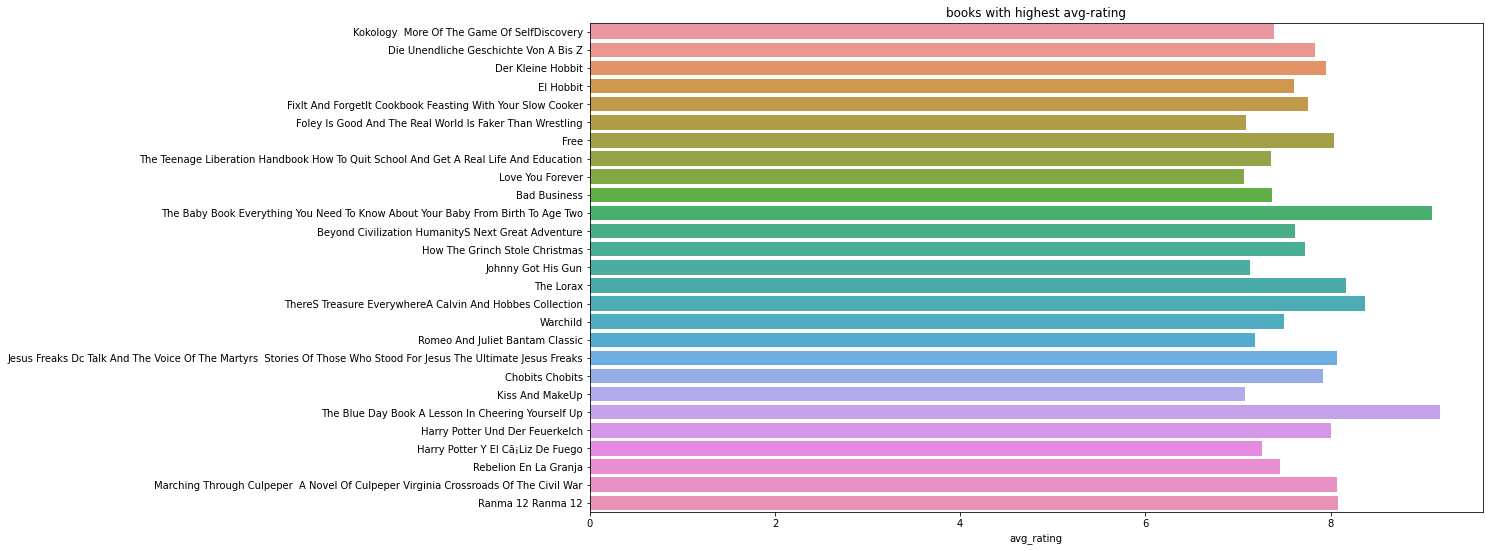

In [164]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=rating_famous_books,y=most_famous_books)
plt.xlabel('avg_rating')
plt.title('books with highest avg-rating')

In [165]:
new_readers_userid = list(model_data[model_data['num_of_books_read']<11]['User-ID'].unique())
new_readers_userid

[85099,
 135872,
 46054,
 92554,
 204124,
 236515,
 276813,
 278161,
 3323,
 53943,
 86284,
 38308,
 98763,
 154218,
 216945,
 115875,
 117258,
 40840,
 68073,
 83539,
 172397,
 200434,
 249079,
 63228,
 232624,
 163821,
 115754,
 233776,
 8100,
 191072,
 208417,
 149810,
 187289,
 122647,
 163588,
 199756,
 228904,
 180702,
 107382,
 72540,
 10951,
 22351,
 112898,
 36597,
 64185,
 19060,
 6689,
 222901,
 41624,
 94503,
 137766,
 3077,
 227131,
 121849,
 139376,
 28601,
 170198,
 84584,
 19886,
 188120,
 18403,
 64596,
 172905,
 12965,
 61298,
 246913,
 200001,
 149825,
 11844,
 94900,
 174586,
 160340,
 146993,
 202668,
 236790,
 222409,
 152956,
 130396,
 124723,
 140802,
 12246,
 123925,
 163816,
 194296,
 115161,
 149153,
 133542,
 223134,
 19046,
 156499,
 145706,
 126928,
 203963,
 160449,
 146641,
 121493,
 245428,
 27745,
 162654,
 59615,
 161916,
 106338,
 48662,
 132383,
 106453,
 18470,
 129665,
 80119,
 64498,
 180569,
 5923,
 237234,
 180989,
 277562,
 242616,
 220248,
 1

In [166]:
def new_user_rec(user_id):
    user_books = set(uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'])
    return set(most_famous_books)-user_books

In [167]:
new_user_rec(64142)

{'Bad Business',
 'Beyond Civilization HumanityS Next Great Adventure',
 'Chobits Chobits',
 'Der Kleine Hobbit',
 'Die Unendliche Geschichte Von A Bis Z',
 'El Hobbit',
 'FixIt And ForgetIt Cookbook Feasting With Your Slow Cooker',
 'Foley Is Good And The Real World Is Faker Than Wrestling',
 'Free',
 'Harry Potter Und Der Feuerkelch',
 'Harry Potter Y El Cã¡Liz De Fuego',
 'How The Grinch Stole Christmas',
 'Jesus Freaks Dc Talk And The Voice Of The Martyrs  Stories Of Those Who Stood For Jesus The Ultimate Jesus Freaks',
 'Johnny Got His Gun',
 'Kiss And MakeUp',
 'Kokology  More Of The Game Of SelfDiscovery',
 'Love You Forever',
 'Marching Through Culpeper  A Novel Of Culpeper Virginia Crossroads Of The Civil War',
 'Ranma 12 Ranma 12',
 'Rebelion En La Granja',
 'Romeo And Juliet Bantam Classic',
 'The Baby Book Everything You Need To Know About Your Baby From Birth To Age Two',
 'The Blue Day Book A Lesson In Cheering Yourself Up',
 'The Lorax',
 'The Teenage Liberation Handbook

In [168]:
final_model.loc[final_model['avg_rating'].idxmax(),['Book-Title','avg_rating']]

Book-Title    The Blue Day Book A Lesson In Cheering Yoursel...
avg_rating                                             9.181818
Name: 284480, dtype: object

# Similarity based model for book recommendation for frequent readers

In [169]:
model_data.shape

(941105, 7)

In [170]:
model_data[model_data['Book-Rating']==0].shape

(589252, 7)

In [171]:
rating_based_similarity= model_data[model_data['Book-Rating']!=0]
rating_based_similarity.shape

(351853, 7)

In [172]:
rating_based_similarity.isnull().sum()

Book-Title              0
avg_rating              0
User-ID                 0
Book-Rating             0
Age                     0
num_times_book_rated    0
num_of_books_read       0
dtype: int64

In [173]:
rating_based_similarity[rating_based_similarity['num_of_books_read']<50].shape

(166010, 7)

In [174]:
user_count_df['num_times_book_rated'].value_counts()

1       121146
2        39940
3        18709
4        10622
5         6951
6         4768
7         3526
8         2680
9         2056
10        1664
11        1387
12        1143
13         987
14         850
15         725
16         630
17         556
18         469
19         441
20         356
21         352
23         321
22         294
24         268
25         255
26         254
28         230
27         205
29         193
30         170
31         153
33         152
32         132
34         124
35         121
37         105
38         104
36         101
39          96
40          96
42          92
43          90
41          81
44          70
47          67
46          64
48          64
53          63
45          59
49          58
54          57
56          54
55          54
50          53
51          50
59          47
57          42
52          42
62          38
61          38
64          37
65          34
72          33
58          33
80          30
71          30
66        

In [175]:
rating_based_similarity_model=rating_based_similarity[rating_based_similarity['num_of_books_read']>50]

In [176]:
rating_based_similarity_model.shape

(184820, 7)

In [177]:
df1 = rating_based_similarity_model.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating',aggfunc='mean')

In [178]:
df1.fillna(0,inplace=True)

In [179]:
df1=df1.T
df1

Book-Title,A Nutshell Handbook,Boule De Suif Penguin Classics,How To Travel With A Salmon And Other Essays,L Is For Lawless,Lady ChatterleyS Lover,Lamb To The Slaughter And Other Stories Penguin 60S S,Mein Verwundetes Herz Das Leben Der Lilli Jahn 1900 1944,Sie Belieben Wohl Zu Scherzen Mr Feynman Abenteuer Eines Neugierigen Physikers,Small G Eine Sommeridylle,010100 A Novel Of The Millennium,...,Â¡Corre Perro Corre,Â¿Eres Tu Mi Mamã¡Are You My Mother,ÃNgeles Fugaces Falling Angels,ÃÂ Kolumnen,ÃÂBer Das Fernsehen,ÃÂBer Den ProzeãÂ Der Zivilisation 1,ÃÂBer Den ProzeãÂ Der Zivilisation 2,ÃÂBer Die Freiheit,ÃÂRger Mit Produkt X Roman,ÃÂThique En Toc
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [181]:
df1_rating_based_simi = 1-pairwise_distances(df1.values,metric='cosine')


In [182]:
df1_rating_based_simi

array([[1.        , 0.        , 0.        , ..., 0.        , 0.03134779,
        0.        ],
       [0.        , 1.        , 0.05914909, ..., 0.        , 0.        ,
        0.04203123],
       [0.        , 0.05914909, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03134779, 0.        , 0.        , ..., 0.        , 1.        ,
        0.04744794],
       [0.        , 0.04203123, 0.        , ..., 0.        , 0.04744794,
        1.        ]])

In [183]:
np.fill_diagonal(df1_rating_based_simi,0)

In [184]:
df1_rating_based_model=pd.DataFrame(df1_rating_based_simi)

In [185]:
df1_rating_based_model

,0,1,2,3,4,5,6,7,8,9,...,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691
0,0.000000,0.000000,0.000000,0.073763,0.0,0.0,0.000000,0.0,0.000000,0.053469,...,0.000000,0.000000,0.000000,0.030970,0.000000,0.0,0.000000,0.0,0.031348,0.000000
1,0.000000,0.000000,0.059149,0.000000,0.0,0.0,0.028209,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.042031
2,0.000000,0.059149,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,0.073763,0.000000,0.000000,0.000000,0.0,0.0,0.052287,0.0,0.023609,0.017482,...,0.025579,0.000000,0.016199,0.000000,0.017365,0.0,0.014205,0.0,0.050290,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2688,0.000000,0.000000,0.000000,0.014205,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020196,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2689,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072809,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2690,0.031348,0.000000,0.000000,0.050290,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.047448


In [186]:
df1_rating_based_model.index=rating_based_similarity_model['User-ID'].unique()
df1_rating_based_model.columns=rating_based_similarity_model['User-ID'].unique()
df1_rating_based_model

,102967,87141,127233,39396,76626,204946,158226,90616,236727,278418,...,109771,117210,213531,123215,151143,198930,116006,227397,206202,232106
102967,0.000000,0.000000,0.000000,0.073763,0.0,0.0,0.000000,0.0,0.000000,0.053469,...,0.000000,0.000000,0.000000,0.030970,0.000000,0.0,0.000000,0.0,0.031348,0.000000
87141,0.000000,0.000000,0.059149,0.000000,0.0,0.0,0.028209,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.042031
127233,0.000000,0.059149,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
39396,0.073763,0.000000,0.000000,0.000000,0.0,0.0,0.052287,0.0,0.023609,0.017482,...,0.025579,0.000000,0.016199,0.000000,0.017365,0.0,0.014205,0.0,0.050290,0.000000
76626,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198930,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
116006,0.000000,0.000000,0.000000,0.014205,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020196,0.000000,0.0,0.000000,0.0,0.000000,0.000000
227397,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072809,0.000000,0.0,0.000000,0.0,0.000000,0.000000
206202,0.031348,0.000000,0.000000,0.050290,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.047448


In [187]:
df1_rating_based_model.idxmax()

102967     87143
87141     185233
127233      8284
39396     207494
76626      27647
           ...  
198930      3757
116006    224138
227397     72214
206202    237474
232106    162738
Length: 2692, dtype: int64

In [188]:
df1_rating_based_model.sort_values(35859,ascending=False).head(10)

,102967,87141,127233,39396,76626,204946,158226,90616,236727,278418,...,109771,117210,213531,123215,151143,198930,116006,227397,206202,232106
150968,0.000000,0.000000,0.0,0.055543,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.085965,0.0,0.000000,0.000000,0.000000,0.090215
119364,0.000000,0.102344,0.0,0.000000,0.0,0.0,0.000000,0.046509,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066024
65145,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
87143,0.146679,0.000000,0.0,0.042202,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.045354,0.000000,0.014733,0.0,0.012754,0.000000,0.097048,0.000000
108352,0.000000,0.024378,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
218344,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.026522,0.035349,0.0,0.022521,...,0.020023,0.0,0.000000,0.000000,0.019574,0.0,0.000000,0.000000,0.030011,0.000000
169682,0.000000,0.000000,0.0,0.064716,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
185514,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.027408,0.000000
149084,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.070901,0.0,0.000000,0.049617,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
224159,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.035966,0.000000,0.000000


In [189]:
reader1 = set(uncleaned_master_data[uncleaned_master_data['User-ID']==35859]['Book-Title'].values)
reader1

{'The LionS Game',
 'Sanctuary Peter Decker Amp Rina Lazarus Novels Paperback',
 'The Love Talker',
 'A Deadly Sickness',
 'The Next Accident',
 'Mistletoe Man',
 'Misery Loves Maggody  An Arly Hanks Mystery Maggody SeriesJoan Hess',
 'Water Touching Stone',
 'UhuraS Song',
 'Rock Critic Murders',
 'Windy City Blues VI Warshawski Novels Hardcover',
 'Concrete Jungle Predator',
 'Recovery Star Trek Book 73',
 'Circle Of Wolves',
 'Secrets Of Harry Bright',
 'Talking Dirty Laundry With The Queen Of Clean',
 'Mazes Amp Monsters',
 'She Loves Me Not',
 'The Stranger On The Road To Emmaus',
 'The Vampire Journals Zebra Books',
 'Crisis At Crystal Reef Star Wars Young Jedi Knights Book 14',
 'Wideacre  A Novel',
 'The Girl Who Cried Monster Goosebumps No 8',
 'Dead ManS Ransom',
 'Skyward',
 'The Bad Beginning A Series Of Unfortunate Events Book 1',
 'Fletch Too',
 'Sleepers',
 'The Feast Of July',
 'No Graves As Yet A Novel Of World War I',
 'Into The Void Star Trek New Frontier No 2',
 'By

In [190]:
reader2 = set(uncleaned_master_data[uncleaned_master_data['User-ID']==130571]['Book-Title'].values)
reader2

{'10 Lb Penalty',
 '1St To Die A Novel',
 '2Nd Chance',
 'A Bend In The Road',
 'A Civil Action',
 'A Cold Day In Paradise Alex Mcknight Mysteries Hardcover',
 'A Dance At The Slaughterhouse Matthew Scudder Mysteries Paperback',
 'A Dark Adapted Eye',
 'A Day Late And A Dollar Short',
 'A Density Of Souls',
 'A FiveYear Plan',
 'A Heartbreaking Work Of Staggering Genius',
 'A Lesson Before Dying Vintage Contemporaries',
 'A Necessary End',
 'A Painted House',
 'A Question Of Blood',
 'A Separate Peace',
 'A Shroud For A Nightingale',
 'A Streetcar Named Desire',
 'A Time To Kill',
 'A Town Like Alice',
 'A Tree Grows In Brooklyn',
 'A Walk To Remember',
 'A Widow For One Year  A Novel',
 'Active Wellness A Personalized 10 Step Program For A Healthy Body Mind Amp Spirit',
 'Age Protectors Your Guide To Perpetual Youth',
 'All Around The Town',
 'All I Really Need To Know',
 'All Our Yesterdays',
 'All Over But The Shoutin',
 'All The Pretty Horses The Border Trilogy Vol 1',
 'All Things

In [191]:
reader1.intersection(reader2)

{'1St To Die A Novel',
 '2Nd Chance',
 'A Bend In The Road',
 'A Day Late And A Dollar Short',
 'A Density Of Souls',
 'A Painted House',
 'A Separate Peace',
 'A Time To Kill',
 'A Walk To Remember',
 'All Over But The Shoutin',
 'American Gods',
 'Atonement A Novel',
 'Bachelor Brothers Bed Amp Breakfast',
 'Bee Season',
 'Bel Canto A Novel',
 'Black Notice',
 'Blindsighted',
 'Body Of Lies',
 'Breathing Lessons',
 'Bridget JonesS Diary',
 'Bright Orange For The Shroud',
 'By Hook Or By Book Prime Crime Mysteries',
 'Chicken Soup For The WomanS Soul Chicken Soup For The Soul Series Paper',
 'Circle Of Friends',
 'City Of Bones',
 'Coastliners  A Novel',
 'Cold Flat Junction',
 'Cold Mountain  A Novel',
 'Cold Sassy Tree',
 'Confessions Of A Shopaholic Summer Display Opportunity',
 'Congo',
 'CorelliS Mandolin  A Novel',
 'Corridor Of Storms First Americans Saga',
 'DaddyS Little Girl',
 'Dancing In The Light',
 'Dark Debts',
 'Dark Paradise',
 'Dead In The Water',
 'Deep South',
 'E 

In [192]:
def rec_book(user_id):
    sim_users = list(df1_rating_based_model.sort_values(user_id,ascending=False).head(5).index)
    sim_books = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users]
    sim_books = np.concatenate(sim_books)
    user_books = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_books)-set(user_books)
                

In [193]:
rec_book(42093)

{'103 Questions Children Ask About Right From Wrong Questions Children Ask',
 '1984',
 '2010 Odyssey Two',
 '2Nd Chance',
 '3001 The Final Odyssey',
 'A Box Of Matches A Novel',
 'A Child Called It One ChildS Courage To Survive',
 'A Christmas Homecoming Bill And Gloria Gaither Present',
 'A Colder Kind Of Death',
 'A Compact Guide To The Christian Life',
 'A Day No Pigs Would Die',
 'A Dictionary Of Bible Types',
 'A Guide Book Of United States Coins 1998 Fully Illustrated Catalog And Retail Valuation List1616 To Date Paper51St Ed',
 'A Handbook For Married Couples',
 'A Healing Season',
 'A Man In Full',
 'A Monk Swimming',
 'A Passage To India',
 'A Perfect Stranger',
 'A Porcupine Named Fluffy',
 'A Prayer For Owen Meany',
 'A Room For The Dead',
 'A Secret Love Cynster Novels',
 'A Stranger For Christmas',
 'A Theory Of Relativity',
 'A Traitor To Memory',
 'A Treasury Of Stories For Seven Year Olds A Treasury Of Stories',
 'A Wizard Of Earthsea Earthsea Trilogy Book 1',
 'A Worki

#  memory based collaborative filtering

In [194]:
model_data

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read
0,A Novel,0.000000,102967,0,54.0,1,2286
1,010100 A Novel Of The Millennium,3.555556,102967,0,54.0,9,2286
2,010100 The Novel Of The Millennium,2.904762,102967,0,54.0,21,2286
3,101 Dalmatians Escape From De Vil Mansion,1.666667,102967,0,54.0,3,2286
4,101 Wacky Sports Quotes,0.000000,102967,0,54.0,2,2286
...,...,...,...,...,...,...,...
941100,ÃRsringen Roman,3.000000,21911,3,27.0,1,1
941101,ÃÂ Kolumnen,7.250000,110734,0,34.0,4,1
941102,ÃÂBer Den Wassern Schweben,7.000000,84834,7,26.0,1,1
941103,ÃÂBerleben In Der WãÂ¼Ste Danakil,3.250000,229149,8,32.0,4,1


In [195]:
model_data.loc[model_data['avg_rating']<=2,'book_status']='worst'
model_data.loc[(model_data['avg_rating']>2) & (model_data['avg_rating']<=4),'book_status']='bad'
model_data.loc[(model_data['avg_rating']>4) & (model_data['avg_rating']<=6),'book_status']='good'
model_data.loc[(model_data['avg_rating']>6) & (model_data['avg_rating']<=8),'book_status']='better'
model_data.loc[model_data['avg_rating']>8,'book_status']='best'

In [196]:
model_data

,Book-Title,avg_rating,User-ID,Book-Rating,Age,num_times_book_rated,num_of_books_read,book_status
0,A Novel,0.000000,102967,0,54.0,1,2286,worst
1,010100 A Novel Of The Millennium,3.555556,102967,0,54.0,9,2286,bad
2,010100 The Novel Of The Millennium,2.904762,102967,0,54.0,21,2286,bad
3,101 Dalmatians Escape From De Vil Mansion,1.666667,102967,0,54.0,3,2286,worst
4,101 Wacky Sports Quotes,0.000000,102967,0,54.0,2,2286,worst
...,...,...,...,...,...,...,...,...
941100,ÃRsringen Roman,3.000000,21911,3,27.0,1,1,bad
941101,ÃÂ Kolumnen,7.250000,110734,0,34.0,4,1,better
941102,ÃÂBer Den Wassern Schweben,7.000000,84834,7,26.0,1,1,better
941103,ÃÂBerleben In Der WãÂ¼Ste Danakil,3.250000,229149,8,32.0,4,1,bad


In [197]:
user_collab_data = model_data[['avg_rating','num_times_book_rated','num_of_books_read','book_status']]
user_collab_data.shape

(941105, 4)

In [198]:
user_collab_data=user_collab_data[(user_collab_data['avg_rating']!=0) & (user_collab_data['num_of_books_read']>50)]

In [199]:
user_collab_data.shape

(512115, 4)

In [200]:
user_collab_data=pd.get_dummies(user_collab_data)

In [201]:
user_collab_data

,avg_rating,num_times_book_rated,num_of_books_read,book_status_bad,book_status_best,book_status_better,book_status_good,book_status_worst
1,3.555556,9,2286,1,0,0,0,0
2,2.904762,21,2286,1,0,0,0,0
3,1.666667,3,2286,0,0,0,0,1
5,1.666667,3,2286,0,0,0,0,1
6,3.616205,469,2286,1,0,0,0,0
...,...,...,...,...,...,...,...,...
835640,2.441176,136,76,1,0,0,0,0
835641,2.217228,267,76,1,0,0,0,0
835642,2.152941,85,76,1,0,0,0,0
835643,2.907407,216,76,1,0,0,0,0


In [202]:
from sklearn.preprocessing import StandardScaler
std_sca = StandardScaler()
std_model_data = std_sca.fit_transform(user_collab_data)

In [203]:
from sklearn.neighbors import NearestNeighbors
n_neighbors=6
model = NearestNeighbors(n_neighbors=n_neighbors,algorithm='ball_tree')
model.fit(std_model_data)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [204]:
distance,user_id = model.kneighbors(std_model_data)

In [205]:
user_id

array([[     0, 234700, 235187,  35407, 235653,  35978],
       [   324,      1, 235684,    274, 234718,  35631],
       [     3,    605,    528,      2,    160,    532],
       ...,
       [512112, 480764, 448264, 489619, 412628, 450659],
       [350746, 493878, 512113, 322907, 467039, 479202],
       [512114, 479488, 357936, 418100, 385229, 436804]], dtype=int64)

In [206]:
distance

array([[0.        , 0.00528382, 0.00528382, 0.01373793, 0.01766231,
        0.0206407 ],
       [0.        , 0.        , 0.00528382, 0.00764489, 0.00922694,
        0.0203866 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00052838, 0.00369867, 0.00528382, 0.00739734,
        0.00792573],
       [0.        , 0.        , 0.        , 0.00052838, 0.00105676,
        0.00105676],
       [0.        , 0.00105676, 0.00317029, 0.00369867, 0.00369867,
        0.0058122 ]])

In [207]:
model_data.loc[10,'Book-Title']

'2Nd Culprit'

In [208]:
book_id=model_data[model_data['Book-Title']=='2Nd Culprit'].index
book_id=book_id[0]
book_id

10

In [209]:
user_id[book_id][1:6]

array([234546, 234996,  35787,    520,     31], dtype=int64)

In [210]:
model_data.loc[user_id[book_id],'Book-Title']

10                                              2Nd Culprit
234546    Dangerous Minds  They Were Problem Kids With O...
234996                                             The Cove
35787                                          My Cat Beany
520                   Ethan Frome Signet Classics Paperback
31                               A House Of Secrets A Novel
Name: Book-Title, dtype: object

In [211]:
def recommend_book(book_title):
    book_list=[]
    book_id=model_data[model_data['Book-Title']==book_title].index
    book_id=book_id[0]
    for i in user_id[book_id][1:n_neighbors]:
        book_list.append(model_data.loc[i,'Book-Title'])
    return book_list

In [212]:
recommend_book('2Nd Culprit')

['Dangerous Minds  They Were Problem Kids With One Last Chance    Her',
 'The Cove',
 'My Cat Beany',
 'Ethan Frome Signet Classics Paperback',
 'A House Of Secrets A Novel']

# Age based model for book recommendation

In [213]:
age_model_data=model_data[['User-ID','Book-Title','Age','num_of_books_read']]
age_model_data

,User-ID,Book-Title,Age,num_of_books_read
0,102967,A Novel,54.0,2286
1,102967,010100 A Novel Of The Millennium,54.0,2286
2,102967,010100 The Novel Of The Millennium,54.0,2286
3,102967,101 Dalmatians Escape From De Vil Mansion,54.0,2286
4,102967,101 Wacky Sports Quotes,54.0,2286
...,...,...,...,...
941100,21911,ÃRsringen Roman,27.0,1
941101,110734,ÃÂ Kolumnen,34.0,1
941102,84834,ÃÂBer Den Wassern Schweben,26.0,1
941103,229149,ÃÂBerleben In Der WãÂ¼Ste Danakil,32.0,1


In [214]:
age_model_data.isnull().sum()

User-ID              0
Book-Title           0
Age                  0
num_of_books_read    0
dtype: int64

In [215]:
age_based_model_data=age_model_data[age_model_data['num_of_books_read']>50]
age_based_model_data.shape

(629736, 4)

In [216]:
age_based_model_data.drop_duplicates(inplace=True)

In [217]:
age_based_model_data.sort_values('Age')

,User-ID,Book-Title,Age,num_of_books_read
454121,84831,Cezanne Posterbook,7.0,76
454178,84831,Sonderheft Merkur 594595 Postmoderne Eine Bila...,7.0,76
454177,84831,Short Plays From The States Vier Einakter Ab K...,7.0,76
454176,84831,Schande,7.0,76
454174,84831,Politischer Extremismus In Der Bundesrepublik ...,7.0,76
...,...,...,...,...
320775,224764,Soul Would Have No Rainbow If The Eyes Had No ...,116.0,960
320776,224764,SoulS Perfection Journey Of The Soul,116.0,960
320777,224764,Souls Raised From The Dead A Novel,116.0,960
320779,224764,Southern Cross A John Marshall Tanner Novel,116.0,960


In [218]:
teen_age = age_based_model_data[(age_based_model_data['Age']<21)]
young_age = age_based_model_data[(age_based_model_data['Age']>20) & (age_based_model_data['Age']<31)]
adult_age = age_based_model_data[(age_based_model_data['Age']>30) & (age_based_model_data['Age']<41)]
mature_age = age_based_model_data[(age_based_model_data['Age']>40) & (age_based_model_data['Age']<61)]
seniors_age = age_based_model_data[(age_based_model_data['Age']>60)]

In [219]:
print(teen_age.shape)
print(young_age.shape)
print(adult_age.shape)
print(mature_age.shape)
print(seniors_age.shape)

(16856, 4)
(179211, 4)
(222532, 4)
(180224, 4)
(26332, 4)


# for teenagers (upto age 20 years)

In [220]:
teen_df = teen_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
teen_df

User-ID,507,638,741,1424,2110,2891,3346,4622,6575,7128,...,249732,249894,249958,250184,250300,250330,250709,277203,278418,278633
Book-Title,,,,,,,,,,,,,,,,,,,,,
Boule De Suif Penguin Classics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Minute Guide To Windows 95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Monologues An Audition Sourcebook From New Dramatists,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 Selected Poems By E E Cummings,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000 More Jokes For Kids,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZolarS Magick Of Color Use The Power Of Color To Transform Your Luck Prosperity Or Romance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zombie Lover Xanth,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zombies DonT Play Soccer Adventures Of The Bailey School Kids Paperback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
teen_df=teen_df.T
teen_df

Book-Title,Boule De Suif Penguin Classics,10 Minute Guide To Windows 95,100 Monologues An Audition Sourcebook From New Dramatists,100 Selected Poems By E E Cummings,1000 More Jokes For Kids,1001 Things Everyone Should Know About Science,101 Back To School Jokes,101 Bug Jokes,101 Dalmatians,101 Dinosaur Jokes,...,Zobmondo The Outrageous Book Of Bizarre Choices,Zodiac,Zoey Plays Games Making Out 9,ZolarS Book Of Astrology Dreams Numbers And Lucky Days,ZolarS Encyclopedia And Dictionary Of Dreams,ZolarS Magick Of Color Use The Power Of Color To Transform Your Luck Prosperity Or Romance,Zombie Lover Xanth,Zombies DonT Play Soccer Adventures Of The Bailey School Kids Paperback,Zoo School,Zork 04 Conquest At Zork
User-ID,,,,,,,,,,,,,,,,,,,,,
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
teen_df_sim = 1-pairwise_distances(teen_df.values,metric='cosine')
teen_df_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [223]:
np.fill_diagonal(teen_df_sim,0)

In [224]:
teen_sim_model = pd.DataFrame(teen_df_sim)
teen_sim_model

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.015640,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.092981,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
6,0.0,0.015640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.012461,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.009670,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [225]:
teen_sim_model.index = teen_age['User-ID'].unique()
teen_sim_model.columns = teen_age['User-ID'].unique()
teen_sim_model

,87141,39396,278418,234623,37950,11676,30533,250709,245963,113519,...,136465,102642,119248,35921,20859,131441,86123,163824,156111,206202
87141,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
39396,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.015640,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
278418,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
234623,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
37950,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.092981,0.000000
11676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
30533,0.0,0.015640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.012461,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
250709,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
245963,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
113519,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.009670,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [226]:
def rec_book_teen_age(user_id):
    sim_users_teen = list(teen_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_teen = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_teen]
    sim_book_teen = np.concatenate(sim_book_teen)
    user_book_teen = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_teen)-set(user_book_teen)

In [227]:
rec_book_teen_age(55927)

{'10 Minute Guide To Windows 95',
 '1001 More Ways To Be Romantic',
 '1001 Ways To Be Romantic',
 '1984',
 '3Rd Degree',
 '84 Charing Cross Road',
 'A Clockwork Orange Norton Paperback Fiction',
 'A CookS Tour  Global Adventures In Extreme Cuisines',
 'A Cup Of Tea Ballantine ReaderS Circle',
 'A Dream Of SadlerS Wells A Piccolo Book',
 'A Fine Balance',
 'A Friend In Rain',
 'A Girl Named Zippy Growing Up Small In Mooreland Indiana Today Show Book Club 3',
 'A Journey With Elsa Cloud',
 'A Matter Of Honour',
 'A Murderous Yarn Needlecraft Mysteries',
 'A Night Without Armor  Poems',
 'A Pocket Mirror For Heroes By The New York Times Bestselling Author Of The Art Of Worldly Wisdom',
 'A Return To Modesty Discovering The Lost Virtue',
 'A Room Of OneS Own',
 'A Separate Peace',
 'A Swiftly Tilting Planet',
 'A Taste Of Heaven',
 'A TravellerS Alphabet Of Essential Places',
 'A Tree Grows In Brooklyn',
 'A Walk To Remember',
 'A Whack On The Side Of The Head How You Can Be More Creative'

# for young readers ( betwwen 20 to 30)

In [228]:
young_df = young_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
young_df=young_df.T
young_df_sim = 1-pairwise_distances(young_df.values,metric='cosine')
np.fill_diagonal(young_df_sim,0)
young_sim_model = pd.DataFrame(young_df_sim)
young_sim_model.index = young_age['User-ID'].unique()
young_sim_model.columns = young_age['User-ID'].unique()
def rec_book_young_age(user_id):
    sim_users_young = list(young_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_young = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_young]
    sim_book_young = np.concatenate(sim_book_young)
    user_book_young = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_young)-set(user_book_young)


In [229]:
young_sim_model

,87141,127233,158226,90616,278418,234623,92853,56447,242299,100644,...,145558,171904,168129,643,94787,109771,123215,151143,198930,227397
87141,0.000000,0.034983,0.037988,0.0,0.035171,0.000000,0.028651,0.000000,0.000000,0.000000,...,0.018364,0.0,0.000000,0.000000,0.000000,0.000000,0.013744,0.000000,0.097956,0.000000
127233,0.034983,0.000000,0.011157,0.0,0.068319,0.006849,0.016829,0.015640,0.018742,0.007493,...,0.010427,0.0,0.014613,0.012847,0.013670,0.010553,0.019881,0.000000,0.020667,0.037775
158226,0.037988,0.011157,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016984,0.0,0.000000,0.000000,0.000000,0.000000,0.016556,0.040199,0.000000,0.000000
90616,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
278418,0.035171,0.068319,0.000000,0.0,0.000000,0.010511,0.012467,0.012000,0.014380,0.000000,...,0.000000,0.0,0.045665,0.009857,0.020977,0.024292,0.024097,0.000000,0.063985,0.023187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109771,0.000000,0.010553,0.000000,0.0,0.024292,0.000000,0.012964,0.000000,0.014438,0.000000,...,0.016065,0.0,0.000000,0.019794,0.000000,0.000000,0.012541,0.000000,0.000000,0.011641
123215,0.013744,0.019881,0.016556,0.0,0.024097,0.000000,0.004785,0.009047,0.002365,0.013711,...,0.009650,0.0,0.021443,0.006350,0.000000,0.012541,0.000000,0.000000,0.021735,0.004608
151143,0.000000,0.000000,0.040199,0.0,0.000000,0.000000,0.000000,0.000000,0.016882,0.000000,...,0.000000,0.0,0.000000,0.000000,0.054594,0.000000,0.000000,0.000000,0.000000,0.000000
198930,0.097956,0.020667,0.000000,0.0,0.063985,0.020304,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.021735,0.000000,0.000000,0.046392


In [230]:
young_age['User-ID']

2286       87141
2291       87141
2292       87141
2296       87141
2303       87141
           ...  
828070    227397
828071    227397
828072    227397
828073    227397
828074    227397
Name: User-ID, Length: 179211, dtype: int64

In [231]:
rec_book_young_age(179744)

{'10 Reasons To Abolish The Imf Amp World Bank Open Media Pamphlet Series',
 '1St To Die A Novel',
 'A Bear Called Paddington',
 'A Fabulous Formless Darkness The Dark Descent Vol 3',
 'A Handful Of Manhood',
 'A Hat Full Of Sky',
 'A Hope In The Unseen  An American Odyssey From The Inner City To The Ivy League',
 'A Lesson Before Dying Vintage Contemporaries Paperback',
 'A Matter Of Life And Sex Plume Fiction',
 'A Monk Swimming',
 'A My Name Is Ami',
 'A New Perspective Women In Islam',
 'A Personal Matter',
 'A Separate Peace',
 'A Star Called Henry Doyle Roddy Last Roundup New York NY V 1',
 'A Sudden Change Of Heart',
 'A Tale Of Two Cities Puffin Classics',
 'A Time To Kill',
 'A Walk In The Woods Rediscovering America On The Appalachian Trail Official Guides To The Appalachian Trail',
 'A Widow For One Year',
 'Absolutely Amazing Ways To Save Money On Everything',
 'Accounting For NonAccountants',
 'Alaska',
 'Alfred HitchcockS Monster Museum',
 'AliceS Adventures In Wonderland

# for adults (between 30 to 40)

In [232]:
adult_df = adult_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
adult_df=adult_df.T
adult_df_sim = 1-pairwise_distances(adult_df.values,metric='cosine')
np.fill_diagonal(adult_df_sim,0)
adult_sim_model = pd.DataFrame(adult_df_sim)
adult_sim_model.index = adult_age['User-ID'].unique()
adult_sim_model.columns = adult_age['User-ID'].unique()
def rec_book_adult_age(user_id):
    sim_users_adult = list(adult_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_adult = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_adult]
    sim_book_adult = np.concatenate(sim_book_adult)
    user_book_adult = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_adult)-set(user_book_adult)


In [233]:
adult_age['User-ID']

2287       87141
2288       87141
2289       87141
2290       87141
2293       87141
           ...  
835640    232106
835641    232106
835642    232106
835643    232106
835644    232106
Name: User-ID, Length: 222532, dtype: int64

In [234]:
rec_book_adult_age(269557)

KeyError: 269557

#  for mature (between 40 to 60)

In [ ]:
mature_df = mature_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
mature_df=mature_df.T
mature_df_sim = 1-pairwise_distances(mature_df.values,metric='cosine')
np.fill_diagonal(mature_df_sim,0)
mature_sim_model = pd.DataFrame(mature_df_sim)
mature_sim_model.index = mature_age['User-ID'].unique()
mature_sim_model.columns = mature_age['User-ID'].unique()
def rec_book_mature_age(user_id):
    sim_users_mature = list(mature_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_mature = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_mature]
    sim_book_mature = np.concatenate(sim_book_mature)
    user_book_mature = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_mature)-set(user_book_mature)


In [ ]:
mature_age['User-ID']

In [ ]:
rec_book_mature_age(172742)

#  for seniors (above 60)

In [ ]:
senior_df = seniors_age.pivot_table(columns='User-ID',index='Book-Title',values='Age',aggfunc='mean',fill_value=0)
senior_df=senior_df.T
senior_df_sim = 1-pairwise_distances(senior_df.values,metric='cosine')
np.fill_diagonal(senior_df_sim,0)
senior_sim_model = pd.DataFrame(senior_df_sim)
senior_sim_model.index = seniors_age['User-ID'].unique()
senior_sim_model.columns = seniors_age['User-ID'].unique()
def rec_book_senior_age(user_id):
    sim_users_senior = list(senior_sim_model.sort_values(user_id,ascending=False).head(5).index)
    sim_book_senior = [uncleaned_master_data[uncleaned_master_data['User-ID']==user]['Book-Title'].values for user in sim_users_senior]
    sim_book_senior = np.concatenate(sim_book_senior)
    user_book_senior = uncleaned_master_data[uncleaned_master_data['User-ID']==user_id]['Book-Title'].values
    return set(sim_book_senior)-set(user_book_senior)


In [ ]:
seniors_age['User-ID']

In [ ]:
rec_book_senior_age(198711)

In [ ]:
import pickle
pickle.dump(uncleaned_master_data,open('uncleaned_master_data.pkl','wb'))

In [ ]:
pickle.dump(most_famous_books,open('most_famous_books.pkl','wb'))


In [ ]:
pickle.dump(model_data,open('model_data.pkl','wb'))